In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
X = X / 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [ ]:
import pandas as pd

data = pd.DataFrame(X)
data.insert(784, "label", y)

data.head()

0    1    2    3    4    5    6    7    8    9  ...  775  776  777  778  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   779  780  781  782  783  label  
0  0.0  0.0  0.0  0.0  0.0      5  
1  0.0  0.0  0.0  0.0  0.0      0  
2  0.0  0.0  0.0  0.0  0.0      4  
3  0.0  0.0  0.0  0.0  0.0      1  
4  0.0  0.0  0.0  0.0  0.0      9  

[5 rows x 785 columns]

In [ ]:
X_train[2]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

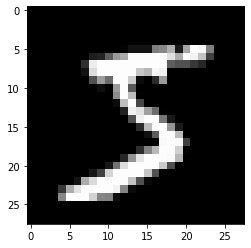

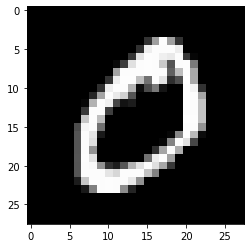

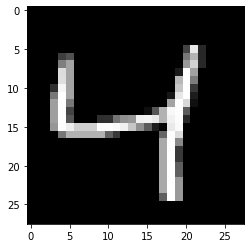

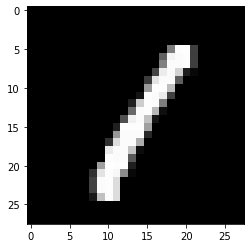

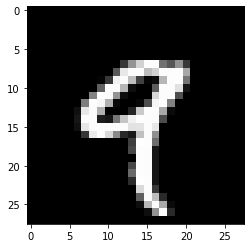

In [ ]:
import matplotlib.pyplot as plt
for i in range(5):
  plt.imshow(X[i].reshape((28, 28)), cmap='gray')
  plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=1, activation = "logistic")
mlp1 = MLPClassifier(hidden_layer_sizes=100, activation = "logistic")
mlp2 = MLPClassifier(hidden_layer_sizes=1000, activation = "logistic")

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(activation='logistic', hidden_layer_sizes=1000)

In [ ]:
mlp.fit(X_train, y_train)
mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)

In [ ]:
predictions_NN = mlp.predict(X_test)
predictions_NN

array(['0', '1', '1', ..., '7', '6', '1'], dtype='<U1')

In [ ]:
predictions_NN1 = mlp1.predict(X_test)
predictions_NN1

array(['0', '4', '1', ..., '9', '0', '1'], dtype='<U1')

In [ ]:
predictions_NN2 = mlp2.predict(X_test)
predictions_NN2

array(['0', '4', '1', ..., '9', '0', '1'], dtype='<U1')

Actual Value: 0
Predicted Value: 0


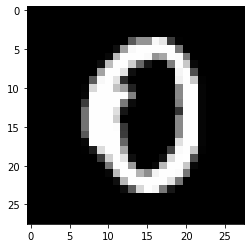

In [ ]:
print(f"Actual Value: {y_test[0]}")
print(f"Predicted Value: {predictions_NN2[0]}")


plt.imshow(X_test[0].reshape((28, 28)), cmap='gray')
plt.show()

Actual Value: 4
Predicted Value For 1 Hidden Layer: 1
Predicted Value For 100 Hidden Layer: 4
Predicted Value For 1000 Hidden Layer: 4


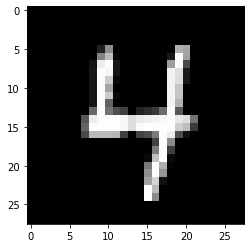

In [ ]:
print(f"Actual Value: {y_test[1]}")
print(f"Predicted Value For 1 Hidden Layer: {predictions_NN[1]}")
print(f"Predicted Value For 100 Hidden Layer: {predictions_NN1[1]}")
print(f"Predicted Value For 1000 Hidden Layer: {predictions_NN2[1]}")


plt.imshow(X_test[1].reshape((28, 28)), cmap='gray')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions_NN)

array([[ 442,   14,  514,  139,    0,    0,  961,    0,    7,    0],
       [  10, 2069,   21,   65,  168,    0,   11,    0,   29,   12],
       [ 232,  129,  459,  416,   10,    0,  816,    7,   32,   14],
       [  51,  394,  315, 1004,   44,    0,   96,   24,  127,   62],
       [   3,  551,   17,   68,  509,    0,    7,   83,   22,  744],
       [  75,  212,  472,  948,   16,    0,   69,   22,   69,   17],
       [ 147,   10,  153,   60,    2,    0, 1670,    0,    1,    2],
       [   0,   63,    2,   14,  101,    0,    0, 1601,    4,  404],
       [  22,  487,  212, 1091,   46,    0,   13,   10,  140,   21],
       [   1,  137,    6,   26,  148,    0,    2,  983,    7,  816]])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions_NN))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.45      0.21      0.29      2077
           1       0.51      0.87      0.64      2385
           2       0.21      0.22      0.21      2115
           3       0.26      0.47      0.34      2117
           4       0.49      0.25      0.33      2004
           5       0.00      0.00      0.00      1900
           6       0.46      0.82      0.59      2045
           7       0.59      0.73      0.65      2189
           8       0.32      0.07      0.11      2042
           9       0.39      0.38      0.39      2126

    accuracy                           0.41     21000
   macro avg       0.37      0.40      0.36     21000
weighted avg       0.37      0.41      0.36     21000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix(y_test, predictions_NN1)

array([[2043,    0,    2,    2,    2,    3,   15,    1,    8,    1],
       [   0, 2354,   12,    4,    3,    1,    2,    6,    2,    1],
       [   1,    7, 2060,    8,    9,    3,    4,   10,   12,    1],
       [   2,    5,   17, 2033,    1,   19,    1,   13,   15,   11],
       [   1,    4,    4,    2, 1943,    1,   11,    6,    3,   29],
       [   4,    0,    3,   14,    4, 1834,   14,    2,   13,   12],
       [   5,    3,    1,    0,   13,   10, 2001,    3,    9,    0],
       [   1,    6,    8,    7,    7,    3,    0, 2143,    3,   11],
       [   5,   14,    5,   14,    7,    8,    5,    1, 1969,   14],
       [   6,    0,    1,    4,   23,    3,    2,   13,    8, 2066]])

In [ ]:
print(classification_report(y_test,predictions_NN1))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2077
           1       0.98      0.99      0.99      2385
           2       0.97      0.97      0.97      2115
           3       0.97      0.96      0.97      2117
           4       0.97      0.97      0.97      2004
           5       0.97      0.97      0.97      1900
           6       0.97      0.98      0.98      2045
           7       0.97      0.98      0.98      2189
           8       0.96      0.96      0.96      2042
           9       0.96      0.97      0.97      2126

    accuracy                           0.97     21000
   macro avg       0.97      0.97      0.97     21000
weighted avg       0.97      0.97      0.97     21000



In [ ]:
confusion_matrix(y_test, predictions_NN2)

array([[2051,    0,    4,    1,    2,    3,   11,    1,    3,    1],
       [   1, 2360,    9,    3,    2,    0,    2,    6,    1,    1],
       [   2,    3, 2077,    4,    3,    0,    1,   12,   11,    2],
       [   0,    2,   14, 2063,    0,    9,    0,   15,   10,    4],
       [   1,    2,    3,    2, 1967,    0,    5,    5,    3,   16],
       [   4,    2,    4,   17,    8, 1824,   18,    2,   12,    9],
       [   4,    4,    2,    0,   13,    6, 2007,    3,    6,    0],
       [   1,    4,   11,    1,    9,    1,    0, 2145,    4,   13],
       [   3,   14,    6,   14,    5,    1,    6,    1, 1983,    9],
       [   1,    1,    1,   10,   30,    2,    2,   13,   10, 2056]])

In [ ]:
print(classification_report(y_test,predictions_NN2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2077
           1       0.99      0.99      0.99      2385
           2       0.97      0.98      0.98      2115
           3       0.98      0.97      0.97      2117
           4       0.96      0.98      0.97      2004
           5       0.99      0.96      0.97      1900
           6       0.98      0.98      0.98      2045
           7       0.97      0.98      0.98      2189
           8       0.97      0.97      0.97      2042
           9       0.97      0.97      0.97      2126

    accuracy                           0.98     21000
   macro avg       0.98      0.98      0.98     21000
weighted avg       0.98      0.98      0.98     21000

